### The process of feature screening and drawing descriptions

In [1]:
#Import the relevant packages
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
import pandas as pd
import xgboost as xgb
from numpy import *
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
import catboost
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [2]:
#Catboost outputs the variable name with the lowest feature ranking
def fea_output1(tr_x1,tr_y1):
    cb = catboost.CatBoostRegressor(silent=True)
    cb.fit(tr_x1,tr_y1)
    fea_ = cb.feature_importances_
    fea_=pd.DataFrame(fea_)
    fea_.rename(columns={0:'fea'},inplace=True)
    fea_name = cb.feature_names_
    fea_name=pd. DataFrame(fea_name)
    fea_name.rename(columns={0:'fea_name'},inplace=True)
    fea=pd.concat([fea_,fea_name],axis=1)
    #Sort by the value of the last 1 column from smallest to largest
    fea.sort_values(by='fea',axis=0,ascending=True,inplace=True)
    a=fea['fea_name'].iloc[0]
    return a
#xgboost outputs the lowest ranking variable name for features
def fea_output2(x,y):
    xgb_model=xgb.XGBRegressor()
    xgb_model.fit(x,y)
    fea_=xgb_model.feature_importances_
    fea_=pd.DataFrame(fea_)
    fea_.rename(columns={0:'fea'},inplace=True)
    
    fea_name=x.columns
    fea_name=pd. DataFrame(fea_name)
    fea_name.rename(columns={0:'fea_name'},inplace=True)
    fea=pd.concat([fea_,fea_name],axis=1)
    #Sort by the value of the last 1 column from smallest to largest
    fea.sort_values(by='fea',axis=0,ascending=True,inplace=True)
    a=fea['fea_name'].iloc[0]
    return a

def get_mae(tr_x1,tr_y1,te_x1,te_y1):
    cb = catboost.CatBoostRegressor(silent=True)
    cb.fit(tr_x1,tr_y1)
    y_pred1 = cb.predict(te_x1)
    cbmae=mae(te_y1,y_pred1)

    xgb_model=xgb.XGBRegressor()
    xgb_model.fit(tr_x1,tr_y1)
    y_pred2 = xgb_model.predict(te_x1)
    xgmae=mae(te_y1,y_pred2)
    return cbmae,xgmae
#Output the mape after deleting the variable using catboost
def cat_get_mape(tr_x1,tr_y1,te_x1,te_y1):
    cb = catboost.CatBoostRegressor(silent=True)
    cb.fit(tr_x1,tr_y1)
    y_pred1 = cb.predict(te_x1)
    cbmape=mape(te_y1,y_pred1)
    return  cbmape
#Output the mape after deleting the variable using xgboost
def xg_get_mape(tr_x1,tr_y1,te_x1,te_y1):
    xgb_model=xgb.XGBRegressor()
    xgb_model.fit(tr_x1,tr_y1)
    y_pred2 = xgb_model.predict(te_x1)
    xgmape=mape(te_y1,y_pred2)
    return xgmape
#Update the dataset to remove the lowest ranked column
def updata_dataset(x,a):
    x.drop(a,inplace=True,axis=1)
    return x
#Divide the dataset
def devide_dataset(x,y):
    tr_x1,te_x1,tr_y1,te_y1=train_test_split(x,y,test_size=0.1,random_state=5)
    return tr_x1,te_x1,tr_y1,te_y1

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

def mae(actual,pred):
    actual,pred=np.array(actual),np.array(pred)
    a=np.mean(np.abs(actual-pred))
    return a

def rmse(actual,pred):
    actual,pred=np.array(actual),np.array(pred)
    a=actual-pred
    b=np.mean(np.power(a, 2))
    c=np.sqrt(b)
    return c

def mse(actual,pred):
    actual,pred=np.array(actual),np.array(pred)
    a=actual-pred
    b=np.mean(np.power(a, 2))
    return b

In [3]:
df1=pd.read_excel("D:\\pyplt\\cat_process.xlsx")
X=df1[['Year', 'Geographic Region', 'Length \n(ft)', 'LWL (ft)',
       'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)', 'Sail Area (sq ft)',
       'Average Cargo Throughput (tons)', 'GDP ($bn)', 'GDP per capita ($)',
       'Average ratio of total logistics cost to GDP',  'DLR',
      'MSR', 'CC', 'LBR', 'MCR']]
Y=df1[['Listing Price (USD)']]

In [4]:
from sklearn.model_selection import train_test_split
x=X.iloc[:,0:17]
y=Y['Listing Price (USD)']
x1=X.iloc[:,0:17]
x2=X.iloc[:,0:17]
m=[]
n=[]
c=[]
d=[]
cb = catboost.CatBoostRegressor(silent=True)
xgb_model=xgb.XGBRegressor()
for i in range(0,17):
    cat_badfea=fea_output1(x1,y) 
    c.append(cat_badfea)
    tr_x1,te_x1,tr_y1,te_y1=devide_dataset(x1,y)
    mape1=cat_get_mape(tr_x1,tr_y1,te_x1,te_y1)
    m.append(mape1)
    pd.DataFrame(x1)
    x1=updata_dataset(x1,cat_badfea)
    
for i in range(0,17):
    xg_badfea=fea_output2(x2,y) 
    d.append(xg_badfea)
    tr_x2,te_x2,tr_y2,te_y2=devide_dataset(x2,y)
    mape2=xg_get_mape(tr_x2,tr_y2,te_x2,te_y2)
    n.append(mape2)
    pd.DataFrame(x2)
    x2=updata_dataset(x2,xg_badfea)

D:\APP.projection\anac_d\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
D:\APP.projection\anac_d\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
D:\APP.projection\anac_d\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
D:\APP.projection\anac_d\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecat

In [5]:
cat_mape=pd.DataFrame(m)
cat_mape.rename(columns={0:'cat_mape'},inplace=True)
cat_badfea=pd.DataFrame(c)
cat_badfea.rename(columns={0:'cat_badfea'},inplace=True)

xg_mape=pd.DataFrame(n)
xg_mape.rename(columns={0:'xg_mape'},inplace=True)
xg_badfea=pd.DataFrame(d)
xg_badfea.rename(columns={0:'xg_badfea'},inplace=True)

cat=pd.concat([cat_mape,cat_badfea],axis=1)
xg=pd.concat([xg_mape,xg_badfea],axis=1)
df_fea_select=pd.concat([cat,xg],axis=1)

In [6]:
df_fea_select

,cat_mape,cat_badfea,xg_mape,xg_badfea
0,0.078745,Geographic Region,0.070910,MSR
1,0.078640,Average Cargo Throughput (tons),0.073189,Geographic Region
2,0.079094,GDP per capita ($),0.073859,Average Cargo Throughput (tons)
3,0.078522,LBR,0.074110,GDP per capita ($)
4,0.077870,Average ratio of total logistics cost to GDP,0.072710,Beam (ft)
5,0.078430,Draft (ft),0.072084,Average ratio of total logistics cost to GDP
6,0.078392,Beam (ft),0.073201,CC
7,0.077484,Displacement (lbs),0.068903,GDP ($bn)
8,0.078355,MSR,0.091287,Draft (ft)
9,0.079743,GDP ($bn),0.090794,DLR


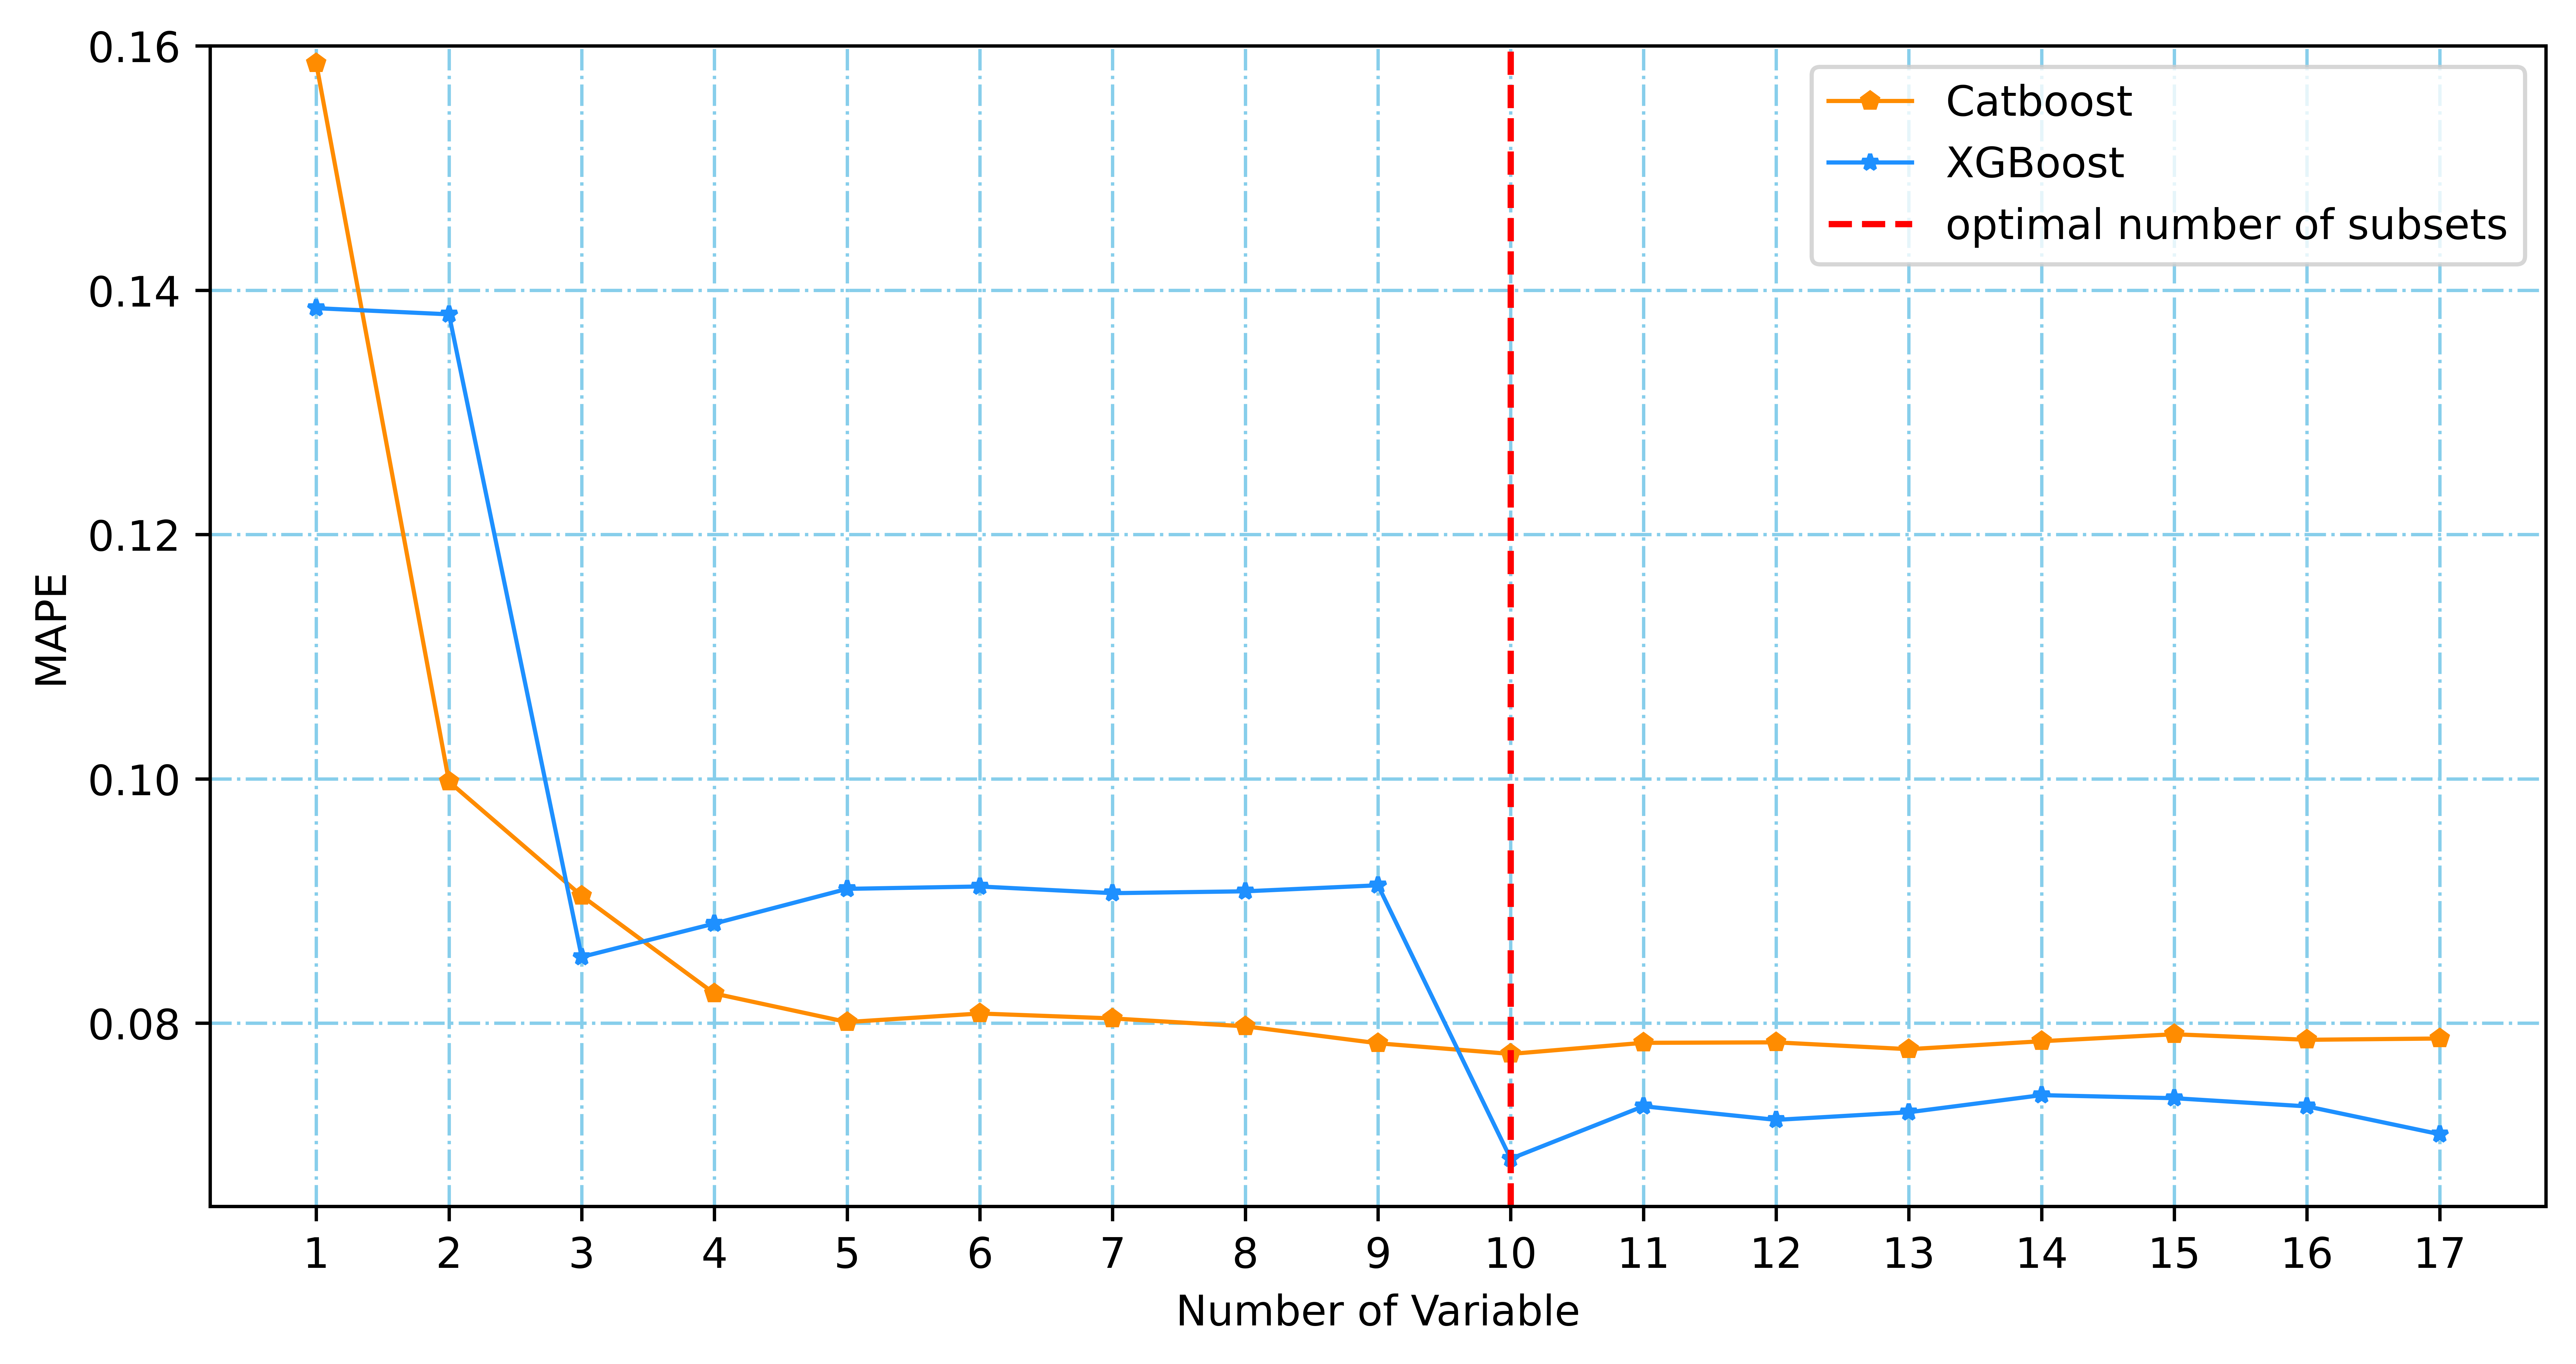

In [7]:
import matplotlib.pyplot as plt
import pandas as pd 
 
plt.figure(figsize=(10, 5), dpi=1000)

df2=pd.read_excel('D:\\pyplt\\fea_select.xlsx')
y1=df2['cat_mape']
y2=df2['xg_mape']
y1=y1.iloc[::-1]
y2=y2.iloc[::-1]
x=range(1,18)

plt.plot(x, y1, lw=1, c='darkorange', marker='p', ms=4, label='Catboost')
plt.plot(x, y2, lw=1, c='dodgerblue', marker='*', ms=4, label='XGBoost')

plt.axvline(10,0,1,color="red",label='optimal number of subsets',linestyle='--')#竖线




plt.xticks(x)  # x轴的刻度
plt.ylim(0.065, 0.16)  # y轴坐标范围
plt.legend()  # 图例
plt.grid(linestyle='-.',c='skyblue')  # 生成网格
plt.xlabel('Number of Variable')  # x轴标注
plt.ylabel('MAPE')  # y轴标注
plt.show()